In [16]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator
import re

#import sys  
#sys.path.insert(0, '/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy')

# Get the current working directory|
cwd = os.getcwd()

# Simulations list

#os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')
#os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p4')
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/TriaScan/PT_nu1_NoBou')
#os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/TriaScan/NT_nu1_NoBou')



#os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/delta_scan/DPT_test')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations

s=g.Sim()

Current working directory: /marconi_work/FUA37_TSVV2/kyungtak/TriaScan/NT_nu1_NoBou


In [17]:
Lx = 600
Ly = 800
R = 700
nx = 244
ny = 324

dx = Lx / (s.nx - 4)
dy = Ly / (s.ny - 4)
xv = np.arange(-1.5 * dx, Lx + 1.5 * dx + dx, dx)
yv = np.arange(-1.5 * dy, Ly + 1.5 * dy + dy, dy)
yn = np.arange(-0.5 * dy, Ly + 2.5 * dy + dy, dy)
Xv, Yv = np.meshgrid(xv, yv)
Xn, Yn = np.meshgrid(xv, yn)

Bpol = s.dpsidx_v**2 + s.dpsidy_v**2
Xpt_coord = np.unravel_index(np.argmin(Bpol[Bpol > 0]), s.dpsidx_v.shape)

iyxpt = Xpt_coord[0]
ixxpt = Xpt_coord[1]

iYup = s.ny - iyxpt
Yxptup = yv[iYup]

Text(0.5, 1.0, '$\\psi$')

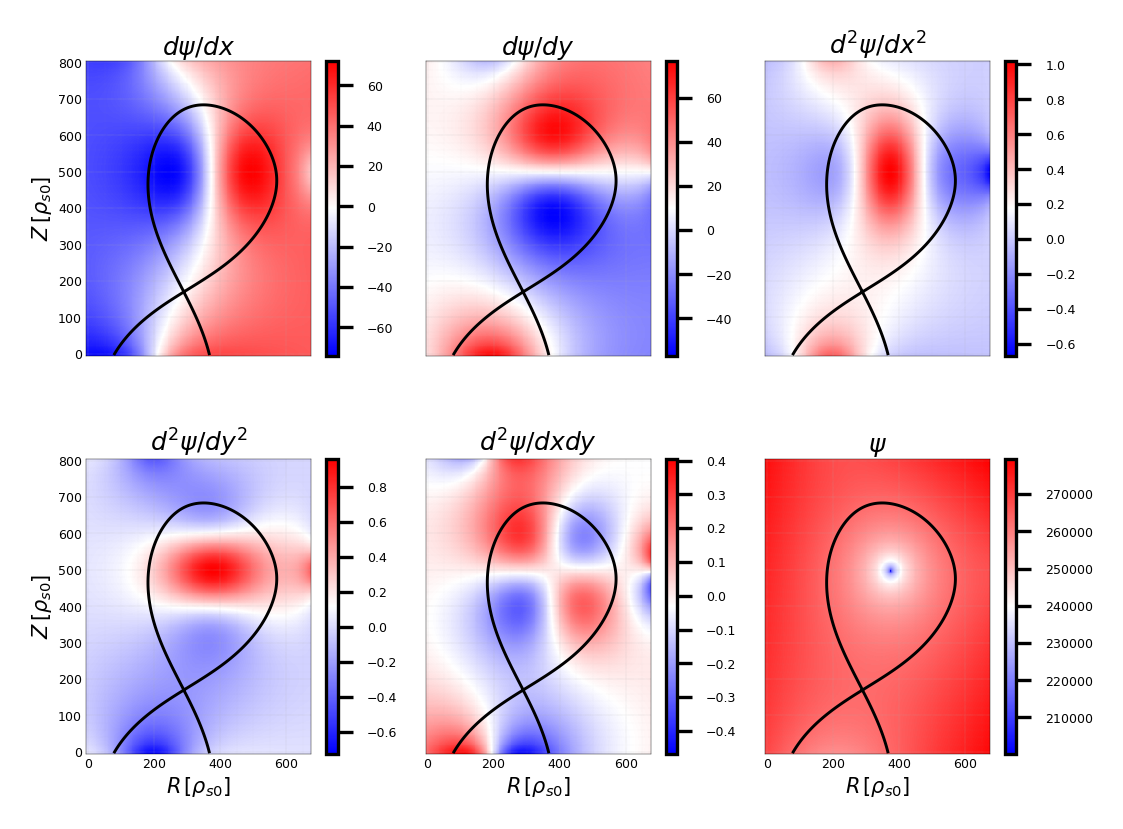

In [18]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(4, 3),  dpi=300, sharex=True, sharey=True)
cs1 = ax[0,0].pcolormesh(X, Y, s.dpsidx_n, cmap='bwr')
cs2 = ax[0,1].pcolormesh(X, Y, s.dpsidy_n, cmap='bwr')
cs3 = ax[0,2].pcolormesh(X, Y, s.d2psidx2_n, cmap='bwr')
cs4 = ax[1,0].pcolormesh(X, Y, s.d2psidy2_n, cmap='bwr')
cs5 = ax[1,1].pcolormesh(X, Y, s.d2psidxdy_n, cmap='bwr')
cs6 = ax[1,2].pcolormesh(X, Y, s.Psi, cmap='bwr')

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs2, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[0,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs3, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs4, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs5, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

divider = make_axes_locatable(ax[1,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs6, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)


for i in range(2):
    for j in range(3):
        ax[i,j].contour(X, Y, s.Psi, levels=[s.Psi[iyxpt, ixxpt]], linewidths=0.7, colors='k')
        ax[i,j].grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
        ax[i,j].grid(True, which='minor', alpha=0.2, linestyle=':', linewidth=0.1)
        ax[i,j].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].yaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].tick_params(axis='x', labelsize=3, pad=1)
        ax[i,j].tick_params(axis='y', labelsize=3, pad=1)
        ax[i,j].tick_params(which='minor', direction="in", size=0)
        ax[i,j].tick_params(which='major', direction="in", size=0)
        ax[i,j].spines["bottom"].set_linewidth(0.1)
        ax[i,j].spines["left"].set_linewidth(0.1)
        ax[i,j].spines["right"].set_linewidth(0.1)
        ax[i,j].spines["top"].set_linewidth(0.1)
        
ax[1,0].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax[1,1].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax[1,2].set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax[0,0].set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=5, rotation=90, labelpad=1)
ax[1,0].set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=5, rotation=90, labelpad=1)

ax[0,0].set_title(r'$d\psi/dx$', fontsize=6, pad=1.5)
ax[0,1].set_title(r'$d\psi/dy$', fontsize=6, pad=1.5)
ax[0,2].set_title(r'$d^2\psi/dx^2$', fontsize=6, pad=1.5)
ax[1,0].set_title(r'$d^2\psi/dy^2$', fontsize=6, pad=1.5)
ax[1,1].set_title(r'$d^2\psi/dxdy$', fontsize=6, pad=1.5)
ax[1,2].set_title(r'$\psi$', fontsize=6, pad=1.5)


#plt.gca().set_aspect('equal')
#plt.show(block=False)
#plt.savefig("/marconi/home/userexternal/klim0000/DNT6_psi_deriv.png", bbox_inches='tight', pad_inches = 0.01, dpi=1200)

Text(0.5, 1.0, 'Bpol')

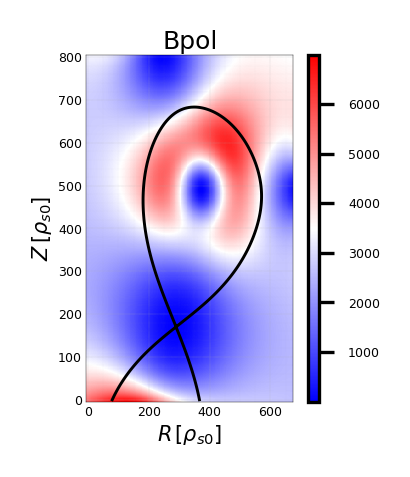

In [19]:
fig, ax = plt.subplots(figsize=(1, 1.5),  dpi=300, sharex=True, sharey=True)
cs = ax.pcolormesh(X, Y, Bpol, cmap='bwr', shading='auto')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=3)

ax.contour(X, Y, s.Psi, levels=[s.Psi[iyxpt, ixxpt]], linewidths=0.7, colors='k')
ax.grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
ax.grid(True, which='minor', alpha=0.2, linestyle=':', linewidth=0.1)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', labelsize=3, pad=1)
ax.tick_params(axis='y', labelsize=3, pad=1)
ax.tick_params(which='minor', direction="in", size=0)
ax.tick_params(which='major', direction="in", size=0)
ax.spines["bottom"].set_linewidth(0.1)
ax.spines["left"].set_linewidth(0.1)
ax.spines["right"].set_linewidth(0.1)
ax.spines["top"].set_linewidth(0.1)

ax.set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=5, labelpad=1)
ax.set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=5, rotation=90, labelpad=1)

ax.set_title('Bpol', fontsize=6, pad=1.5)


#plt.gca().set_aspect('equal')
#plt.show(block=False)
#plt.savefig("/marconi/home/userexternal/klim0000/DNT6_psi_deriv.png", bbox_inches='tight', pad_inches = 0.01, dpi=1200)